
CARGANDO DATASET



Saving Iris.csv to Iris (1).csv
Primeras filas:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa



INFORMACION DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Descripcion estadistica:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000



Valores nulos:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Duplicados:
0

Distribucion de clases:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

HISTOGRAMAS DE VARIABLES NUMERICAS



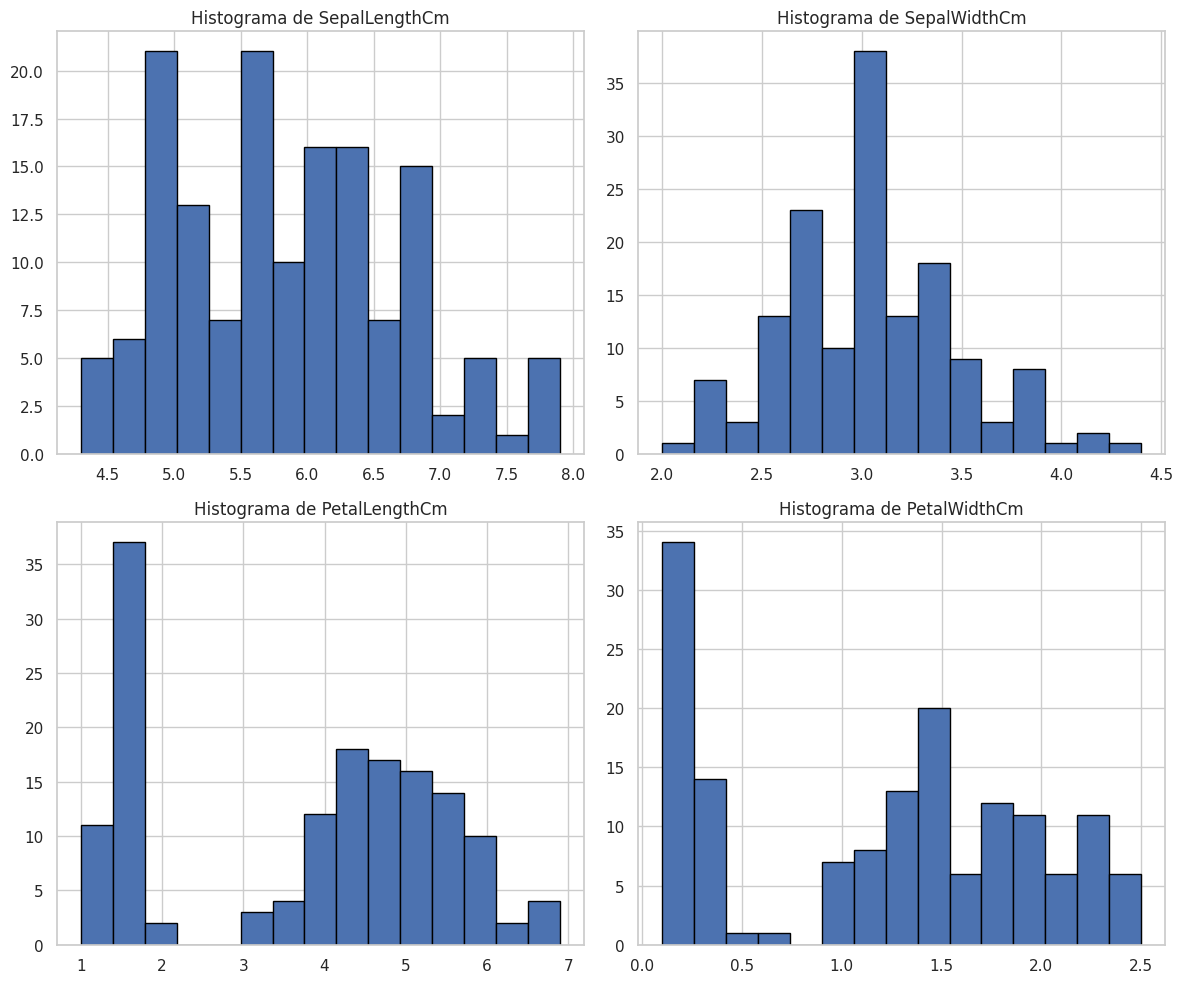


PREPROCESAMIENTO


ENTRENAMIENTO DEL MODELO


METRICAS DEL MODELO

Accuracy:  0.9
Precision: 0.9023569023569024
Recall:    0.9
F1 Score:  0.8997493734335839

MATRIZ DE CONFUSION



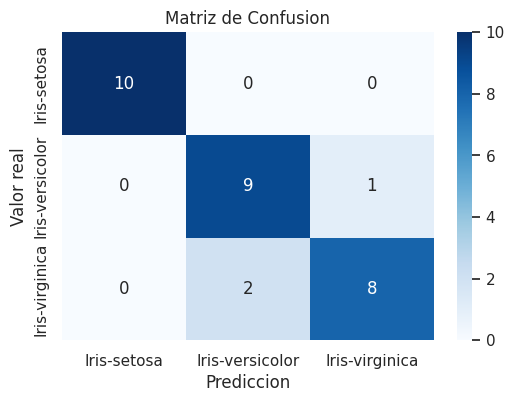


IMPORTANCIA DE VARIABLES



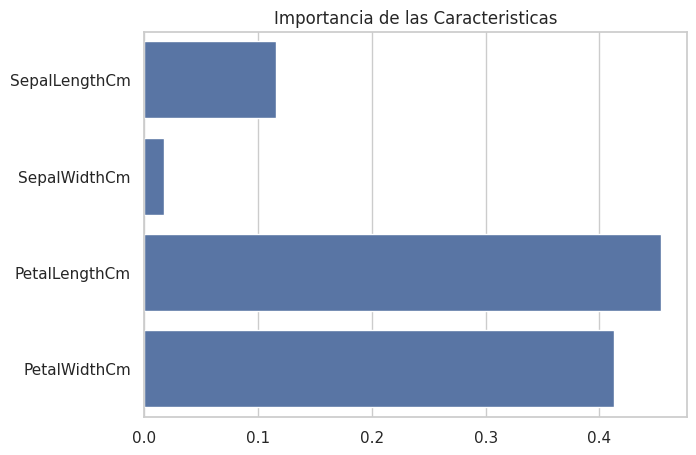

SepalLengthCm: 0.1159
SepalWidthCm: 0.0179
PetalLengthCm: 0.4538
PetalWidthCm: 0.4124


In [2]:
# 1. INSTALACIÓN
!pip install streamlit

# 2. IMPORTAR LIBRERÍAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# 3. CARGAR DATASET

print("\n" + "="*80)
print("CARGANDO DATASET")
print("="*80 + "\n")

from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Iris.csv")

print("Primeras filas:")
display(df.head())

print("\n" + "="*80)
print("INFORMACION DEL DATASET")
print("="*80)
print(df.info())

print("\nDescripcion estadistica:")
display(df.describe())

print("\nValores nulos:")
print(df.isnull().sum())

print("\nDuplicados:")
print(df.duplicated().sum())

print("\nDistribucion de clases:")
print(df["Species"].value_counts())


# 4. HISTOGRAMAS

print("\n" + "="*80)
print("HISTOGRAMAS DE VARIABLES NUMERICAS")
print("="*80 + "\n")

numeric_cols = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=15, edgecolor='black')
    plt.title(f"Histograma de {col}")

plt.tight_layout()
plt.show()


# 5. PREPROCESAMIENTO

print("\n" + "="*80)
print("PREPROCESAMIENTO")
print("="*80 + "\n")

df = df.drop(columns=["Id"])

le = LabelEncoder()
df["Species_cod"] = le.fit_transform(df["Species"])

X = df[numeric_cols]
y = df["Species_cod"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 6. ENTRENAMIENTO DEL MODELO
print("\n" + "="*80)
print("ENTRENAMIENTO DEL MODELO")
print("="*80 + "\n")

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


# 7. METRICAS
print("\n" + "="*80)
print("METRICAS DEL MODELO")
print("="*80 + "\n")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Accuracy:  {accuracy}")
print(f"Precision: {precision}")
print(f"Recall:    {recall}")
print(f"F1 Score:  {f1}")


# 8. MATRIZ DE CONFUSION

print("\n" + "="*80)
print("MATRIZ DE CONFUSION")
print("="*80 + "\n")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matriz de Confusion")
plt.xlabel("Prediccion")
plt.ylabel("Valor real")
plt.show()


# 9. IMPORTANCIA DE CARACTERISTICAS

print("\n" + "="*80)
print("IMPORTANCIA DE VARIABLES")
print("="*80 + "\n")

importances = model.feature_importances_

plt.figure(figsize=(7, 5))
sns.barplot(x=importances, y=numeric_cols)
plt.title("Importancia de las Caracteristicas")
plt.show()

for f, imp in zip(numeric_cols, importances):
    print(f"{f}: {imp:.4f}")
